In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import os
import re

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer

from keras.models import Sequential
from keras.layers import Dense

import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold

#import statsmodels.api as sm,

import seaborn as sns; sns.set()

import pickle

from pandas.core import datetools
%matplotlib inline

In [2]:
model_dict = pickle.load(open("ensemble.pkl",'rb'))
model_dict

C:\Users\202506\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\202506\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\202506\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\202506\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estima

{'DT': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'),
 'RF': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=10, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False),
 'Log': LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
            fit_intercept=True, intercept_scaling=1.0, max_iter=100,
            multi_class='ovr', n_jobs=1, penalty='l2', random_

In [3]:
df = pickle.load(open("sub_data.p",'rb')) # I added code to pull existing data.
# There is code in Useful regress models to generate this pickle file.
mature_filter = (df['loan_status']=='Fully Paid')|(df['loan_status']=='Charged Off')
df['int_rate'] = df['int_rate'].str.replace('\W','').astype('float') / 100
df = df[mature_filter]

In [4]:
[print(col) for col in df.columns]

index
id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
fico_range_low
fico_range_high
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
last_fico_range_high
last_fico_range_low
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_act_il
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [47]:
df['lifetime_return'] = df['total_pymnt'] / df['loan_amnt'] -1
df['yield'] = (df['lifetime_return']) / (df['duration']+1) / 12# +1 removes 

[Text(0,0,'-150%'),
 Text(0,0,'-100%'),
 Text(0,0,'-50%'),
 Text(0,0,'0%'),
 Text(0,0,'50%'),
 Text(0,0,'100%'),
 Text(0,0,'150%')]

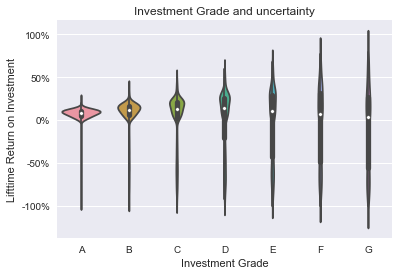

In [50]:
ax = sns.violinplot(x="grade", y="lifetime_return", data=df.sort_values('grade'))
ax.set_title('Investment Grade and uncertainty')
ax.set_xlabel('Investment Grade')
ax.set_ylabel('Lifttime Return on Investment')
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

Note: The shape of the violin plot makes it appear that there are instances where there is more than a 100% loss. This is the shape of the plot. There are no instances of losing more than 100% of your investment.

In [41]:
df[df['lifetime_return']<0]

,index,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,duration,lifetime_return,yield


[Text(0,0,'-600%'),
 Text(0,0,'-500%'),
 Text(0,0,'-400%'),
 Text(0,0,'-300%'),
 Text(0,0,'-200%'),
 Text(0,0,'-100%'),
 Text(0,0,'0%'),
 Text(0,0,'100%')]

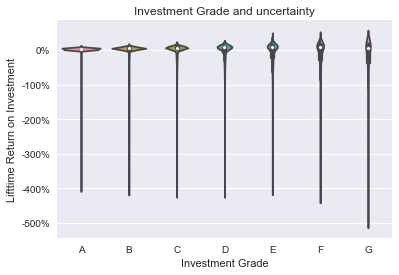

In [53]:
ax = sns.violinplot(x="grade", y="yield", data=df.sort_values('grade'))
ax.set_title('Investment Grade and uncertainty')
ax.set_xlabel('Investment Grade')
ax.set_ylabel('Lifttime Return on Investment')
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x*100) for x in vals])

Note: that grade approximates interest rate. Higher grades have higher interest rates.

Text(0.5,1,'Impact of charged off loan')

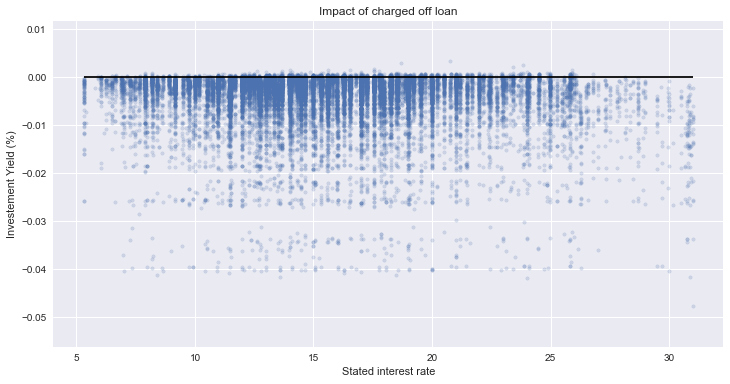

In [70]:
plt.figure(figsize=(12,6))
fil = (df['loan_status']=='Charged Off')
plt.scatter(df[fil]['int_rate'],df[fil]['yield'],marker='.',alpha=.2)
yticks = mtick.FormatStrFormatter('%.0f%%')
plt.hlines(0,min(df[fil]['int_rate']),max(df[fil]['int_rate']))
plt.ylabel('Investement Yield (%)')
plt.xlabel('Stated interest rate')
plt.title('Impact of charged off loan')

Note that some loans still have a positive rate We therefore built a model to first predict the rate, and then the amount charged off from the loan